In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Set global font size and other properties
plt.rcParams.update({
    'font.size': 14,           # Global font size
    'axes.titlesize': 16,      # Font size for axes titles
    'axes.labelsize': 14,      # Font size for x and y labels
    'xtick.labelsize': 12,     # Font size for x-axis tick labels
    'ytick.labelsize': 12,     # Font size for y-axis tick labels
    'legend.fontsize': 12,     # Font size for legend
    'figure.titlesize': 18     # Font size for figure title
})

# Seaborn styling
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv('BETTER_LIFE_INDEX_2024.csv')

## Data Preprocessing and Cleaning

In [2]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              38 non-null     object 
 1   GDP per capita (USD)                                 38 non-null     int64  
 2     Dwellings without basic facilities                 35 non-null     float64
 3     Housing expenditure                                35 non-null     float64
 4     Rooms per person                                   37 non-null     float64
 5     Household net adjusted disposable income           33 non-null     float64
 6     Household net wealth                               29 non-null     float64
 7     Labour market insecurity                           34 non-null     float64
 8     Employment rate                                    38 non-null     int

In [3]:
# Descriptive statistics
df.describe()

,GDP per capita (USD),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care,Life satisfaction
count,38.000000,35.000000,35.000000,37.000000,33.000000,29.000000,34.000000,38.000000,37.000000,35.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,36.000000,22.000000,38.000000
mean,48139.184211,3.051429,20.494286,1.675676,30490.151515,323959.620690,5.182353,68.657895,1.737838,43783.571429,...,84.526316,2.150000,69.105263,80.984211,68.605263,73.842105,2.563158,7.202778,15.069091,6.686842
std,28940.558500,5.373977,2.502580,0.413928,8184.496163,185528.628032,4.300280,7.591874,1.918094,13953.095782,...,8.949519,0.580191,12.513321,2.571836,13.120109,12.979248,5.661316,7.269171,0.607343,0.665835
min,7327.000000,0.000000,14.700000,1.000000,16269.000000,79245.000000,1.000000,48.000000,0.000000,16230.000000,...,62.000000,1.200000,45.000000,75.100000,34.000000,41.000000,0.200000,0.300000,14.100000,4.900000
25%,26553.000000,0.200000,18.650000,1.400000,24590.000000,188627.000000,2.625000,65.250000,0.800000,31265.500000,...,80.250000,1.725000,62.250000,79.000000,62.750000,69.500000,0.500000,2.425000,14.580000,6.200000
50%,43469.500000,0.500000,20.600000,1.700000,29488.000000,294735.000000,3.900000,70.000000,1.200000,45269.000000,...,85.000000,2.150000,68.000000,81.900000,71.500000,77.000000,0.800000,4.400000,14.960000,6.750000
75%,59051.000000,3.000000,21.800000,1.900000,34984.000000,370341.000000,5.775000,74.000000,2.200000,54766.500000,...,91.000000,2.575000,77.750000,82.900000,75.750000,82.750000,1.275000,10.500000,15.502500,7.275000
max,131384.000000,25.900000,27.400000,2.600000,51147.000000,941162.000000,21.700000,80.000000,10.800000,69392.000000,...,98.000000,3.200000,92.000000,84.400000,89.000000,93.000000,26.800000,27.000000,16.470000,7.900000


In [4]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [5]:
# Handle missing values
df['Quality of support network'].fillna(df['Quality of support network'].mean(), inplace=True)
df['Educational attainment'].fillna(df['Educational attainment'].mean(), inplace=True)
df['Life satisfaction'].fillna(df['Life satisfaction'].mean(), inplace=True)

In [6]:
# Convert 'Life satisfaction' to a binary target variable
median_life_satisfaction = df['Life satisfaction'].median()
df['Life satisfaction binary'] = (df['Life satisfaction'] >= median_life_satisfaction).astype(int)

## Exploratory Data Analysis (EDA)

A correlation matrix is an efficient visual statistical representation of the correlation between two variables. 
The range is between 1 and -1.
1 being a perfect correlation, 
0 is no coreelation and 
-1 is a negative influenced correlation. E.g. if one variable increases the other will decrease. 


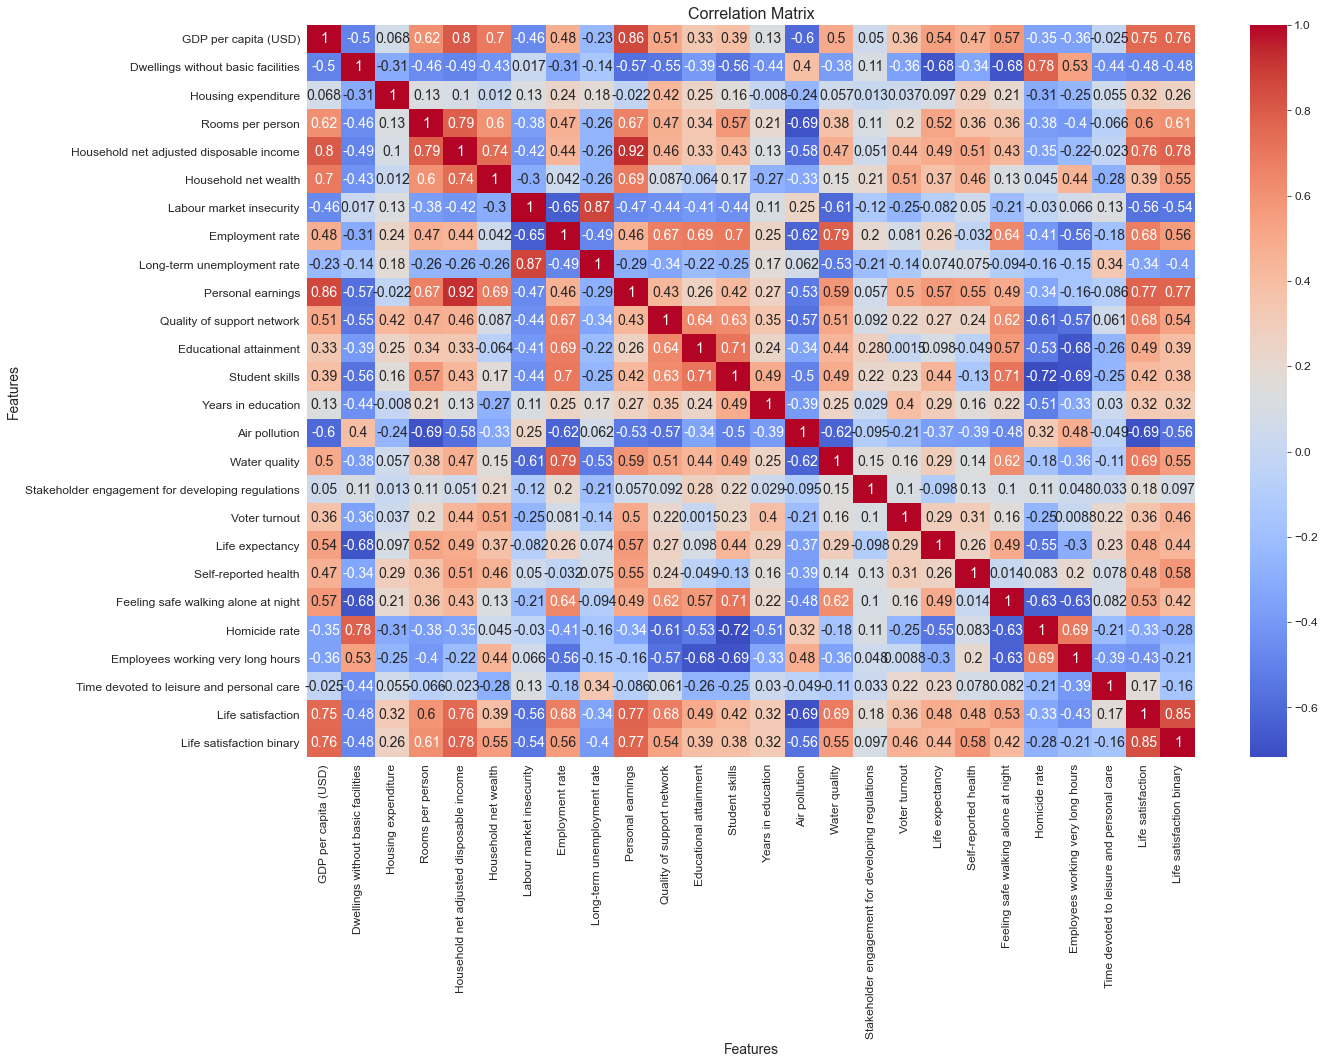

In [7]:
# Correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


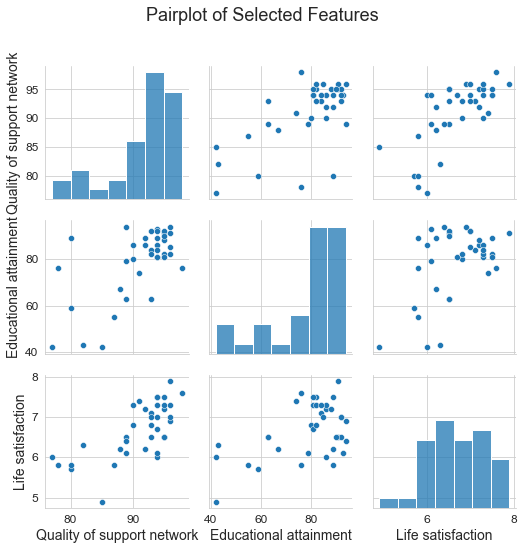

In [8]:
# Pairplot to visualize relationships
sns.pairplot(df[['Quality of support network', 'Educational attainment', 'Life satisfaction']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

The pairplot above visualises the correlation between the projects' initial research subjects. 

Interpretation of Scatter Plots
Quality of support network and Educational Attainment - Positive relationship leaning towards linearity but not pronounced. Some clustering suggesting that there are countries that have the both high scores in each variable.

Educational attainment and Life Satisfaction - moderately positive relationship, stronger linearity present with these two variables

Educational Attainment and Life Satisfaction - positive relationship yet showing a wider spread, this may be due to many other factors contributing to life satisfaction scores. 

Interpretation of Histograms
All three histograms have a positive skewness, suggestion that most countries have a higher score in positive educational attainment and quality of support network. Life satisfaction scores seem to be more spread out but again, more concentration towards higher scores. 

In [9]:
# Multicollinearity Check
# Calculate VIF (Variance Inflation Factor) for each feature
X = df[['Quality of support network', 'Educational attainment']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                      Feature        VIF
0  Quality of support network  44.812453
1      Educational attainment  44.812453


The multicollinearity check has detected a severe multicollinearity which would imply a significant regression when fitting a model to these variables. The effect on a model could potentially increase the risk of overfitting and also skew the predictive performance by making the model sensitive to changes. 

There are a number of ways to address the issue such as removing the weakest correlated variable, increasing data (which isn't practical in this case), applying regulisation techniques to add a penalty to the regression but this does not remove multicollinearity or combining the predictors together if they have a similar indicators. 

I am going to choose to combine the predictors as I wish to maintain the subject matter of the study.

The SES (Socio-Economic Satus) is a measure that will include quality of support network AND educational attainment. This combination will create a more parsimonious model and retain the necessary information for analysis.

PCA (Principal Component Analysis) combines multiple correlated variables into uncorrelated principal components. 
PCA mitigates multicollinearity, which can stabilize regression coefficients and improve model reliability.

In [10]:
# Apply PCA (Principal Component Analysis)

# Select columns
features = ['Quality of support network', 'Educational attainment']
X = df[features]

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=None)

# Fit PCA to the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

# Convert the principal components back to a DataFrame for easier handling
SES = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [11]:
# Split data into training and testing sets using the principal components
X_train, X_test, y_train, y_test = train_test_split(SES, df['Life satisfaction binary'], test_size=0.3, random_state=42)

In [12]:
#Train the Logistic Regression Model
model = LogisticRegression()

In [13]:
# Model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict_proba(X_test)[:, 1]

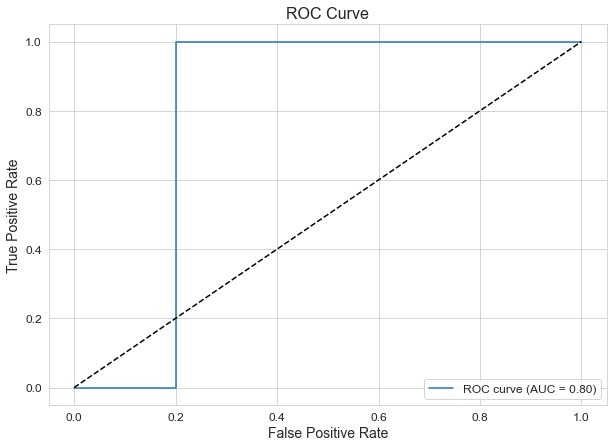

In [14]:
# Model Evaluation

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve depicts that the logistical regression model has been successful. The curve starts near the top left corner, which indicates a good balance between sensitivity (true positive rate) and specificity (low false positive rate). With an AUC (Area Under the Curve) of 0.80, this model demonstrates a strong ability to discriminate between the classes. The sharp rise in the curve and the high AUC score suggest that the model is effective at correctly classifying the majority of instances.

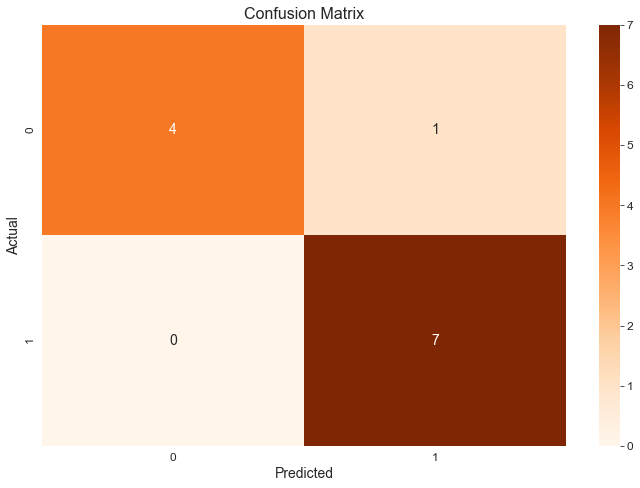

In [15]:
# Predict class labels (0 or 1)
y_pred = model.predict(X_test)

# confusion matrix using the binary predictions
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

The confusion matrix suggests that the logistic regression model performed well, with only one misclassification out of twelve cases. The model has demonstrated strong predictive power, particularly with no false positives and only one false negative, making it highly reliable in this context.

In [16]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



The model correctly predicted 92% of the total instances in the test set (11 out of 12 correct predictions).



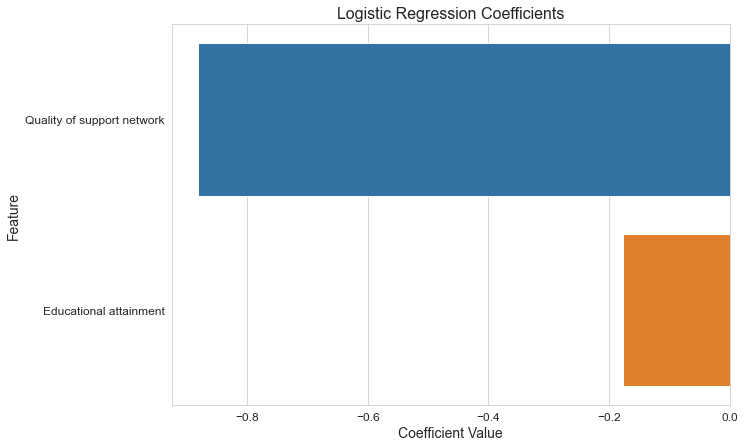

In [17]:
# Model Coefficients Interpretation
# Extract and plot the coefficients
coefficients = model.coef_[0]
features = X.columns
coeff_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})

plt.figure(figsize=(10, 7))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Quality of support network has a higher influence of life satisfaction than educational attainment. 

However the relationships are negative, this is unexpected. 

Domain knowledge expects that an increase in quality of support networks and educational attainment would have a positive impact on life satisfaction. 

Upon checking with previous scatter plots the relationships are expected to be a positive coefficent due to the positive correlations.

The negative correlation could be due to the impact of multicollinearity. 

Feature engineering will be considered to transform the data in an iterative project. 